# Data lending club

En este notebook se desea predecir, antes de conceder un préstamo a una persona, la probabilidad de que no se devuelva completamente. 

### Para cada cliente se tiene la siguiente información: 

| LoanStatNew | Description |	
| :- |:- |
|*addr_state*|	The state provided by the borrower in the loan application									
|*all_util*|	Balance to credit limit on all trades									
|*annual_inc*|	The self-reported annual income provided by the borrower during registration.								
|*annual_inc_joint*|	The combined self-reported annual income provided by the co-borrowers during registration		
|*application_type*|	Indicates whether the loan is an individual application or a joint application with two co-borrower	|*desc*|	Loan description provided by the borrower									
|*dti*|	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.									
|*dti_joint*|	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income									
|*earliest_cr_line*|	The month the borrower's earliest reported credit line was opened									
|*emp_length*|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 									
|*emp_title*|	The job title supplied by the Borrower when applying for the loan.								
|*fico_range_high*|	The upper boundary range the borrower’s FICO at loan origination belongs to.									
|*fico_range_low*|	The lower boundary range the borrower’s FICO at loan origination belongs to.									
|*grade*|	LC assigned loan grade									
|*home_ownership*|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.									
|*id*|	A unique LC assigned ID for the loan listing.									
|*il_util*|	Ratio of total current balance to high credit/credit limit on all install acct									
|*initial_list_status*|	The initial listing status of the loan. Possible values are – W, F									
|*inq_fi*|	Number of personal finance inquiries									
|*inq_last_12m*|	Number of credit inquiries in past 12 months									
|*installment*|	The monthly payment owed by the borrower if the loan originates.									
|*int_rate*|	Interest Rate on the loan									
|*loan_amnt*|	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.									
|*loan_status*|	Current status of the loan									
|*max_bal_bc*|	Maximum current balance owed on all revolving accounts									
|*member_id*|	A unique LC assigned Id for the borrower member.									
|*mo_sin_old_il_acct*|	Months since oldest bank installment account opened									
|*mo_sin_old_rev_tl_op*|	Months since oldest revolving account opened									
|*mort_acc*|	Number of mortgage accounts.									
|*mths_since_last_delinq*|	The number of months since the borrower's last delinquency.									
|*mths_since_last_major_derog*|	Months since most recent 90-day or worse rating									
|*mths_since_last_record*|	The number of months since the last public record.									
|*mths_since_rcnt_il*|	Months since most recent installment accounts opened									
|*mths_since_recent_bc_dlq*|	Months since most recent bankcard delinquency									
|*mths_since_recent_revol_delinq*|	Months since most recent revolving delinquency.									
|*open_acc*|	The number of open credit lines in the borrower's credit file.									
|*open_acc_6m*|	Number of open trades in last 6 months									
|*open_il_12m*|	Number of installment accounts opened in past 12 months									
|*open_il_24m*|	Number of installment accounts opened in past 24 months									
|*open_il_6m*|	Number of currently active installment trades									
|*open_rv_12m*|	Number of revolving trades opened in past 12 months									
|*open_rv_24m*|	Number of revolving trades opened in past 24 months									
|*pub_rec*|	Number of derogatory public records									
|*pub_rec_bankruptcies*|	Number of public record bankruptcies									
|*purpose*|	A category provided by the borrower for the loan request. 									
|*revol_util*|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.									
|*sub_grade*|	LC assigned loan subgrade									
|*term*|	The number of payments on the loan. Values are in months and can be either 36 or 60.									
|*title*|	The loan title provided by the borrower									
|*total_acc*|	The total number of credit lines currently in the borrower's credit file									
|*total_bal_il*|	Total current balance of all installment accounts									
|*total_cu_tl*|	Number of finance trades									
|*url*|	URL for the LC page with listing data.									
|*verification_status*|	Indicates if income was verified by LC, not verified, or if the income source was verified									
|*verified_status_joint*|	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified									
|*zip_code*|	The first 3 numbers of the zip code provided by the borrower in the loan application.						

### 1. Preprocessing básico


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [20]:
direction = 'aprendizaje_supervisado_practica_1/'
data = pd.read_csv(direction + 'pd_data_initial_preprocessing.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
data.head()

,id,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,112435993,https://lendingclub.com/browse/loanDetail.acti...,148xx,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,...,w,Individual,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
1,112290210,https://lendingclub.com/browse/loanDetail.acti...,021xx,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,...,w,Individual,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
2,112436985,https://lendingclub.com/browse/loanDetail.acti...,018xx,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,...,w,Individual,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
3,112439006,https://lendingclub.com/browse/loanDetail.acti...,913xx,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,...,w,Individual,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
4,112438929,https://lendingclub.com/browse/loanDetail.acti...,560xx,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,...,w,Individual,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884884 entries, 0 to 884883
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              884884 non-null  object 
 1   url                             884876 non-null  object 
 2   zip_code                        884876 non-null  object 
 3   mths_since_last_record          155100 non-null  float64
 4   il_util                         216581 non-null  float64
 5   mths_since_recent_bc_dlq        225434 non-null  float64
 6   mths_since_rcnt_il              242773 non-null  float64
 7   all_util                        249497 non-null  float64
 8   inq_fi                          249524 non-null  float64
 9   max_bal_bc                      249524 non-null  float64
 10  total_cu_tl                     249524 non-null  float64
 11  open_acc_6m                     249524 non-null  float64
 12  open_act_il     

Con esto nos podemos hacer una idea de cómo está compuesto el dataset. Son 51 variables y 884884 observaciones. 
No todas las variables son numéricas, así que habrá que ver cómo trabajar con ellas (39 numéricas, 12 no).

In [23]:
#Eliminamos las variables id, url, zip_code y emp_title del dataset, ya que no nos aportan información.
data=data.drop(['id','url','zip_code','emp_title'],axis=1)

In [24]:
#También eliminamos las observaciones con todo valores nulos
data = data.dropna(axis=0,how='all')

In [16]:
data.head()

,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,0.0,0.0,0.0,...,w,Individual,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
1,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,6.0,2.0,1.0,...,w,Individual,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
2,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,5.0,1.0,0.0,...,w,Individual,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
3,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,1.0,1.0,10.0,...,w,Individual,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
4,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,0.0,0.0,1.0,...,w,Individual,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mths_since_last_record,155100.0,69.193056,26.469788,0.00,51.00,69.00,88.00,1.210000e+02
il_util,216581.0,68.935964,24.314068,0.00,54.00,71.00,86.00,4.640000e+02
mths_since_recent_bc_dlq,225434.0,39.128632,22.793899,0.00,20.00,37.00,58.00,1.950000e+02
mths_since_rcnt_il,242773.0,21.217005,25.439242,0.00,7.00,14.00,24.00,4.330000e+02
all_util,249497.0,58.072927,20.934080,0.00,44.00,59.00,73.00,2.110000e+02
inq_fi,249524.0,0.985092,1.470832,0.00,0.00,0.00,1.00,2.700000e+01
max_bal_bc,249524.0,5746.256717,5503.678029,0.00,2300.00,4397.00,7504.00,5.717930e+05
total_cu_tl,249524.0,1.448702,2.616477,0.00,0.00,0.00,2.00,7.100000e+01
open_acc_6m,249524.0,0.897461,1.106632,0.00,0.00,1.00,1.00,1.600000e+01
open_act_il,249524.0,2.880861,3.088793,0.00,1.00,2.00,3.00,5.500000e+01


In [18]:
data.isna().sum()
#Numero de valores nulos por variable

mths_since_last_record            729776
il_util                           668295
mths_since_recent_bc_dlq          659442
mths_since_rcnt_il                642103
all_util                          635379
inq_fi                            635352
max_bal_bc                        635352
total_cu_tl                       635352
open_acc_6m                       635352
open_act_il                       635352
open_il_12m                       635352
total_bal_il                      635352
open_rv_12m                       635352
open_rv_24m                       635352
open_il_24m                       635352
inq_last_12m                      635352
mths_since_last_major_derog       633263
mths_since_recent_revol_delinq    569042
mths_since_last_delinq            431427
emp_length                         51193
mo_sin_old_il_acct                 25614
revol_util                           489
dti                                  261
verification_status                    0
annual_inc      

Habrá que tener cuidado, ya que muchas variables del dataset tienen nulos. En especial habrá que estudiar cómo imputar los valores y si merece la pena hacerlo con las variables con porcentajes tan altos de nulos. Por ejemplo,en la variable mths_since_last_record hay un 82% de valores nulos, lo que puede hacer inviable su imputación.


In [19]:
#Vamos a ver la cantidad de valores unicos que hay en cada variable.
data.nunique()

mths_since_last_record              122
il_util                             221
mths_since_recent_bc_dlq            162
mths_since_rcnt_il                  307
all_util                            165
inq_fi                               25
max_bal_bc                        23621
total_cu_tl                          46
open_acc_6m                          15
open_act_il                          45
open_il_12m                          12
total_bal_il                      88946
open_rv_12m                          25
open_rv_24m                          43
open_il_24m                          19
inq_last_12m                         37
mths_since_last_major_derog         171
mths_since_recent_revol_delinq      163
mths_since_last_delinq              157
emp_length                           10
mo_sin_old_il_acct                  520
revol_util                         1271
dti                                6756
verification_status                   3
annual_inc                        48006


Para terminar el análisis descriptivo de las variables, las representaremos en forma de histograma y boxplot

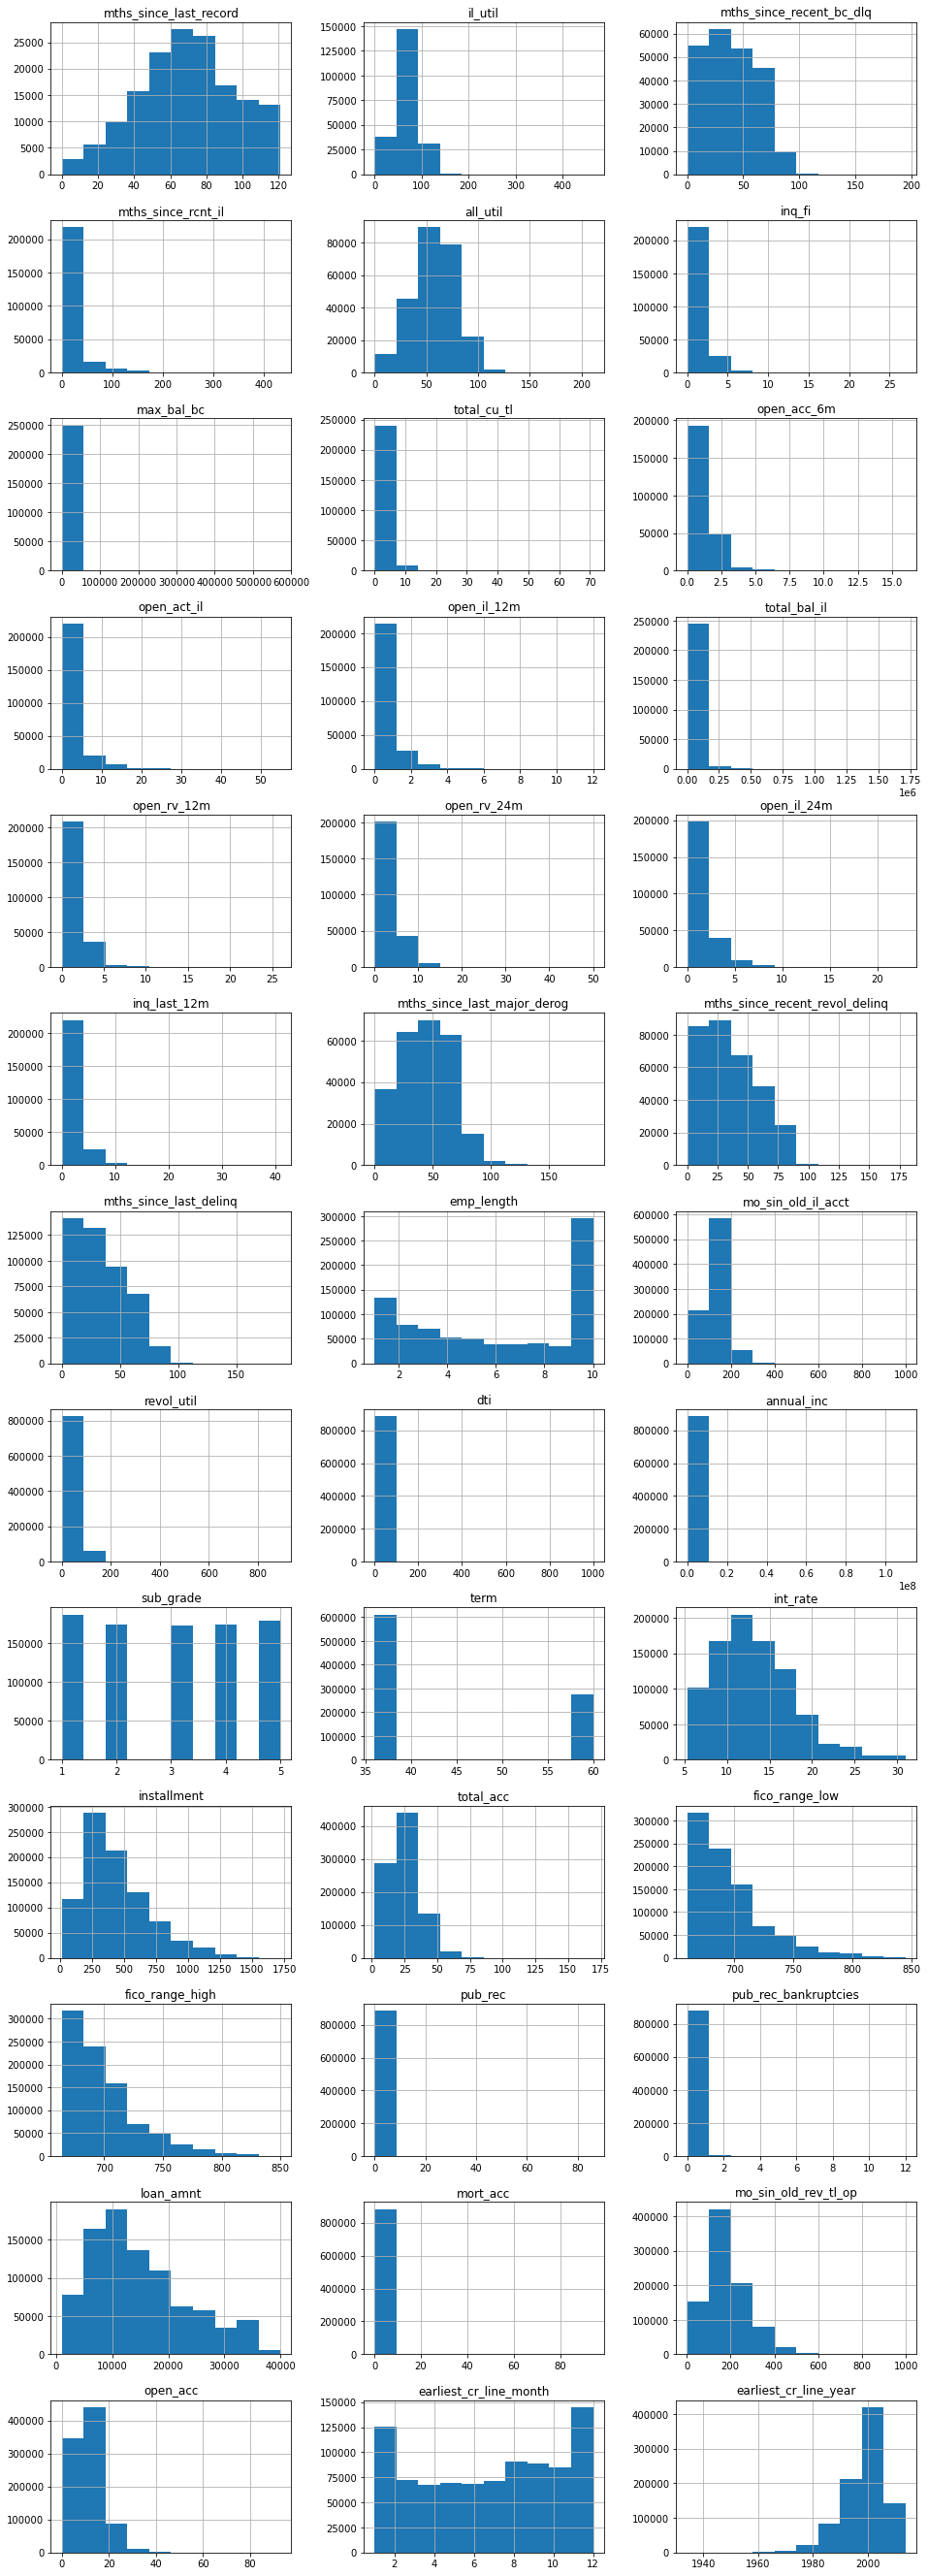

In [20]:
data.hist(figsize=(16,48),layout=(13,3)) #bins son la cantidad de barras
plt.show()

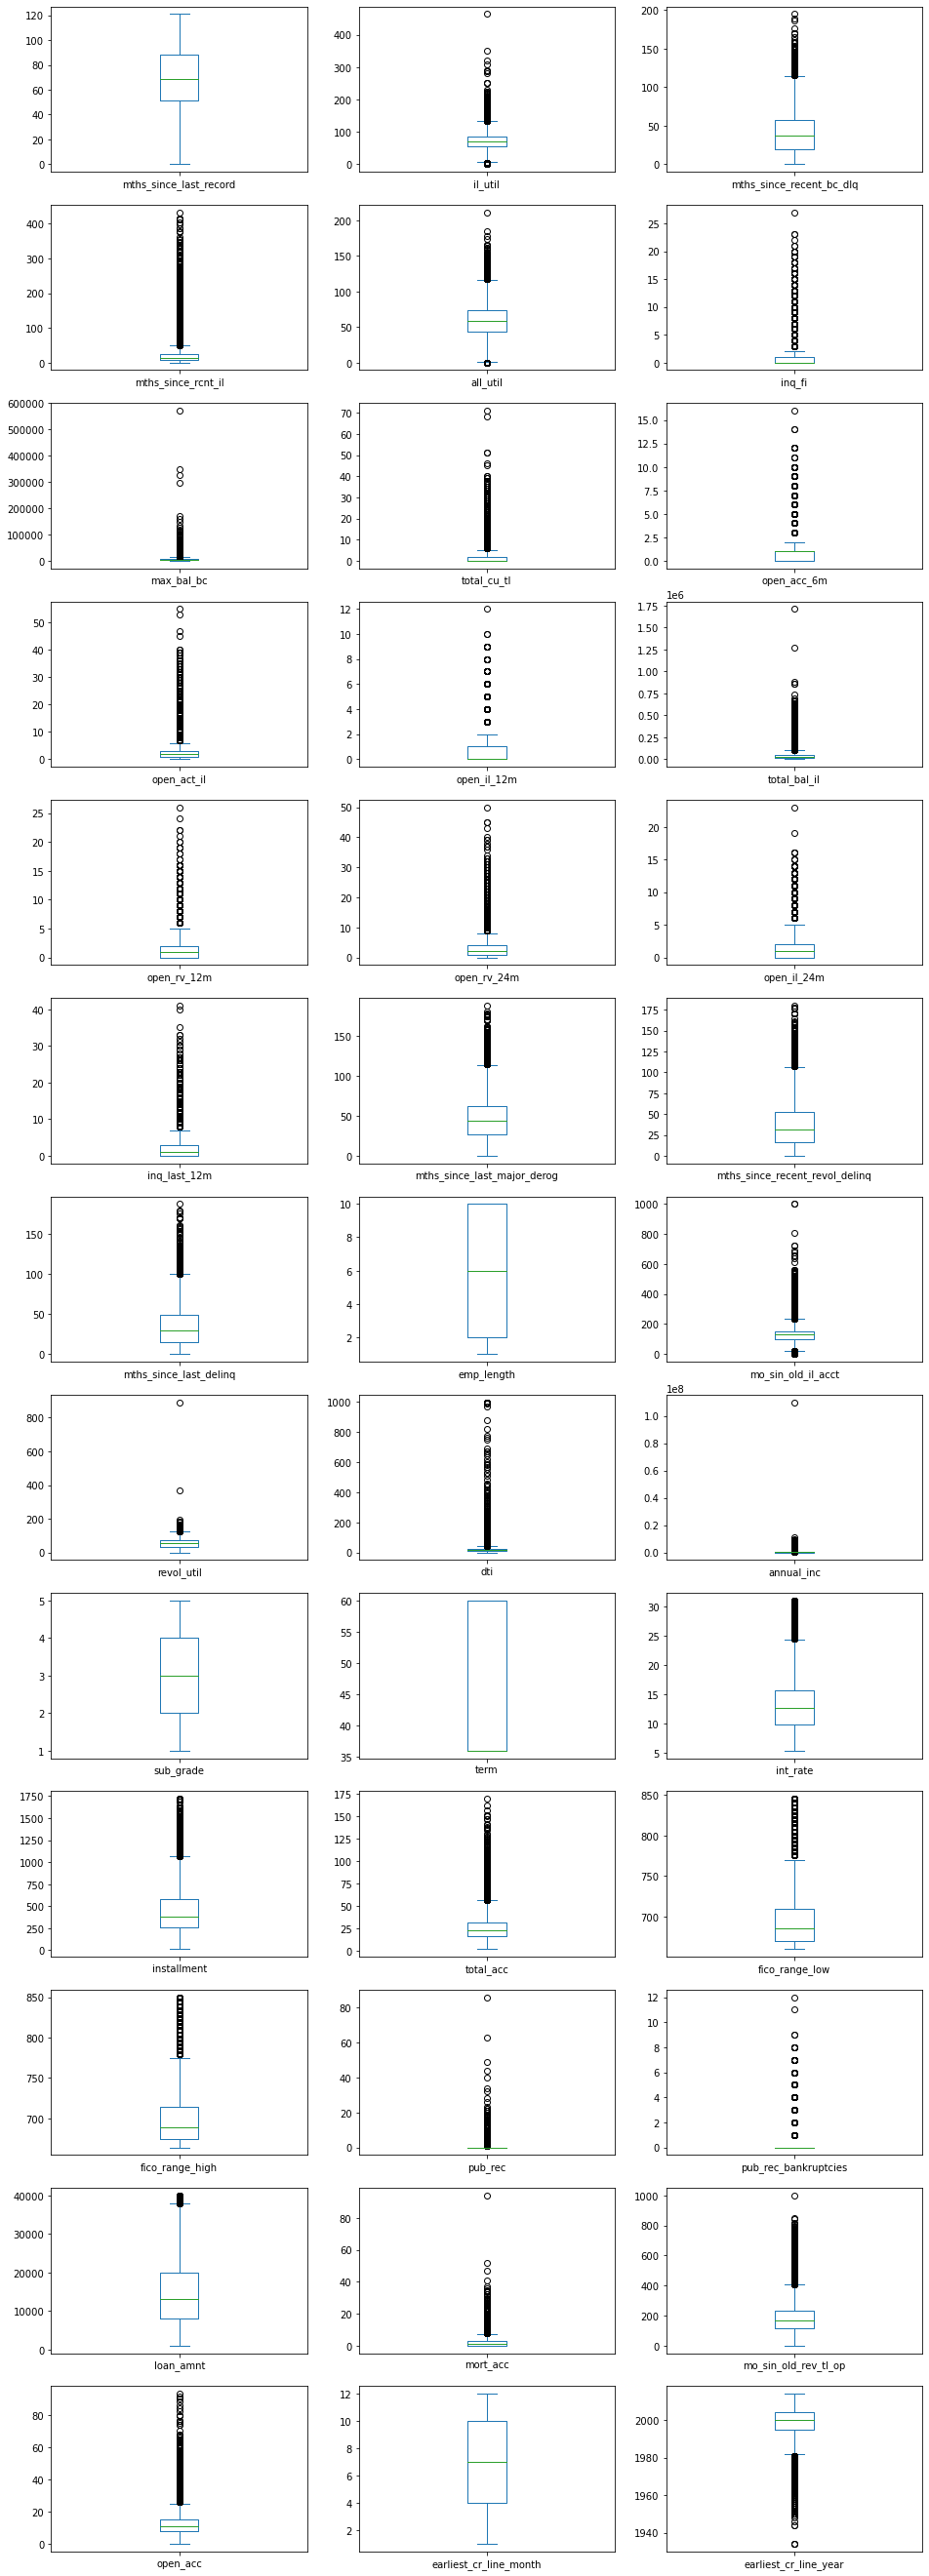

In [21]:
data.plot(figsize=(16,48),kind='box', subplots=True,layout=(13,3),sharex=False, sharey=False)
plt.show()

Vamos a estudiar la distribución de la variable objetivo loan_status

In [22]:
data['loan_status'].value_counts()

Current               422685
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

<AxesSubplot:>

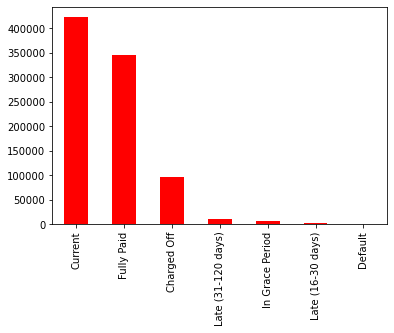

In [23]:
data['loan_status'].value_counts().plot(kind='bar',color = 'red',linewidth = 3)

Loan_status es una variable categórica con 7 niveles y sin valores nulos. La mayoría de los valores son current y fully paid.

Por último, calcularemos la correlación entre variables.

In [24]:
data.corr()

,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,...,fico_range_low,fico_range_high,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
mths_since_last_record,1.000000,-0.037540,-0.057360,-0.032272,-0.014922,-0.042597,0.000346,0.004893,-0.055815,-0.002077,...,0.210486,0.210486,-0.271428,0.237999,-0.005499,-0.126552,-0.130708,0.032690,0.003539,0.122281
il_util,-0.037540,1.000000,0.060892,-0.279929,0.593590,0.150360,-0.112540,0.028667,0.165298,0.328907,...,-0.131003,-0.131003,0.014497,0.016969,-0.097055,-0.047261,-0.110368,0.135907,0.019291,0.084515
mths_since_recent_bc_dlq,-0.057360,0.060892,1.000000,-0.031998,0.044862,0.036750,-0.017689,0.005231,0.069360,-0.017298,...,-0.004356,-0.004356,0.116538,0.141381,-0.047508,-0.020753,0.002736,-0.018812,0.001701,-0.000433
mths_since_rcnt_il,-0.032272,-0.279929,-0.031998,1.000000,-0.121841,-0.210663,0.017891,-0.140431,-0.184580,-0.212217,...,-0.021591,-0.021588,-0.013397,-0.028170,-0.021203,-0.064018,0.036113,-0.154603,0.001690,-0.046849
all_util,-0.014922,0.593590,0.044862,-0.121841,1.000000,0.077283,0.125339,0.045566,-0.056383,0.375587,...,-0.427142,-0.427143,-0.017093,-0.024774,0.008626,-0.033800,-0.091511,-0.006149,0.020473,0.060016
inq_fi,-0.042597,0.150360,0.036750,-0.210663,0.077283,1.000000,-0.080155,0.085965,0.154810,0.085837,...,-0.082352,-0.082353,0.062950,0.069057,-0.005323,0.095614,-0.041625,0.103958,-0.000904,0.028889
max_bal_bc,0.000346,-0.112540,-0.017689,0.017891,0.125339,-0.080155,1.000000,-0.009401,-0.082341,0.022062,...,0.061076,0.061070,-0.101392,-0.116872,0.388533,0.230375,0.230835,0.118276,-0.008780,-0.208462
total_cu_tl,0.004893,0.028667,0.005231,-0.140431,0.045566,0.085965,-0.009401,1.000000,0.082488,0.072386,...,0.006084,0.006083,-0.001744,0.016141,0.074835,0.179413,0.061243,0.099378,-0.003978,-0.054601
open_acc_6m,-0.055815,0.165298,0.069360,-0.184580,-0.056383,0.154810,-0.082341,0.082488,1.000000,0.060527,...,-0.057584,-0.057586,0.054268,0.055810,-0.023191,0.063408,-0.002444,0.271011,-0.001395,-0.011898
open_act_il,-0.002077,0.328907,-0.017298,-0.212217,0.375587,0.085837,0.022062,0.072386,0.060527,1.000000,...,-0.016544,-0.016547,-0.032597,-0.031642,0.035945,-0.021288,-0.083292,0.524301,0.031706,0.054504


<AxesSubplot:>

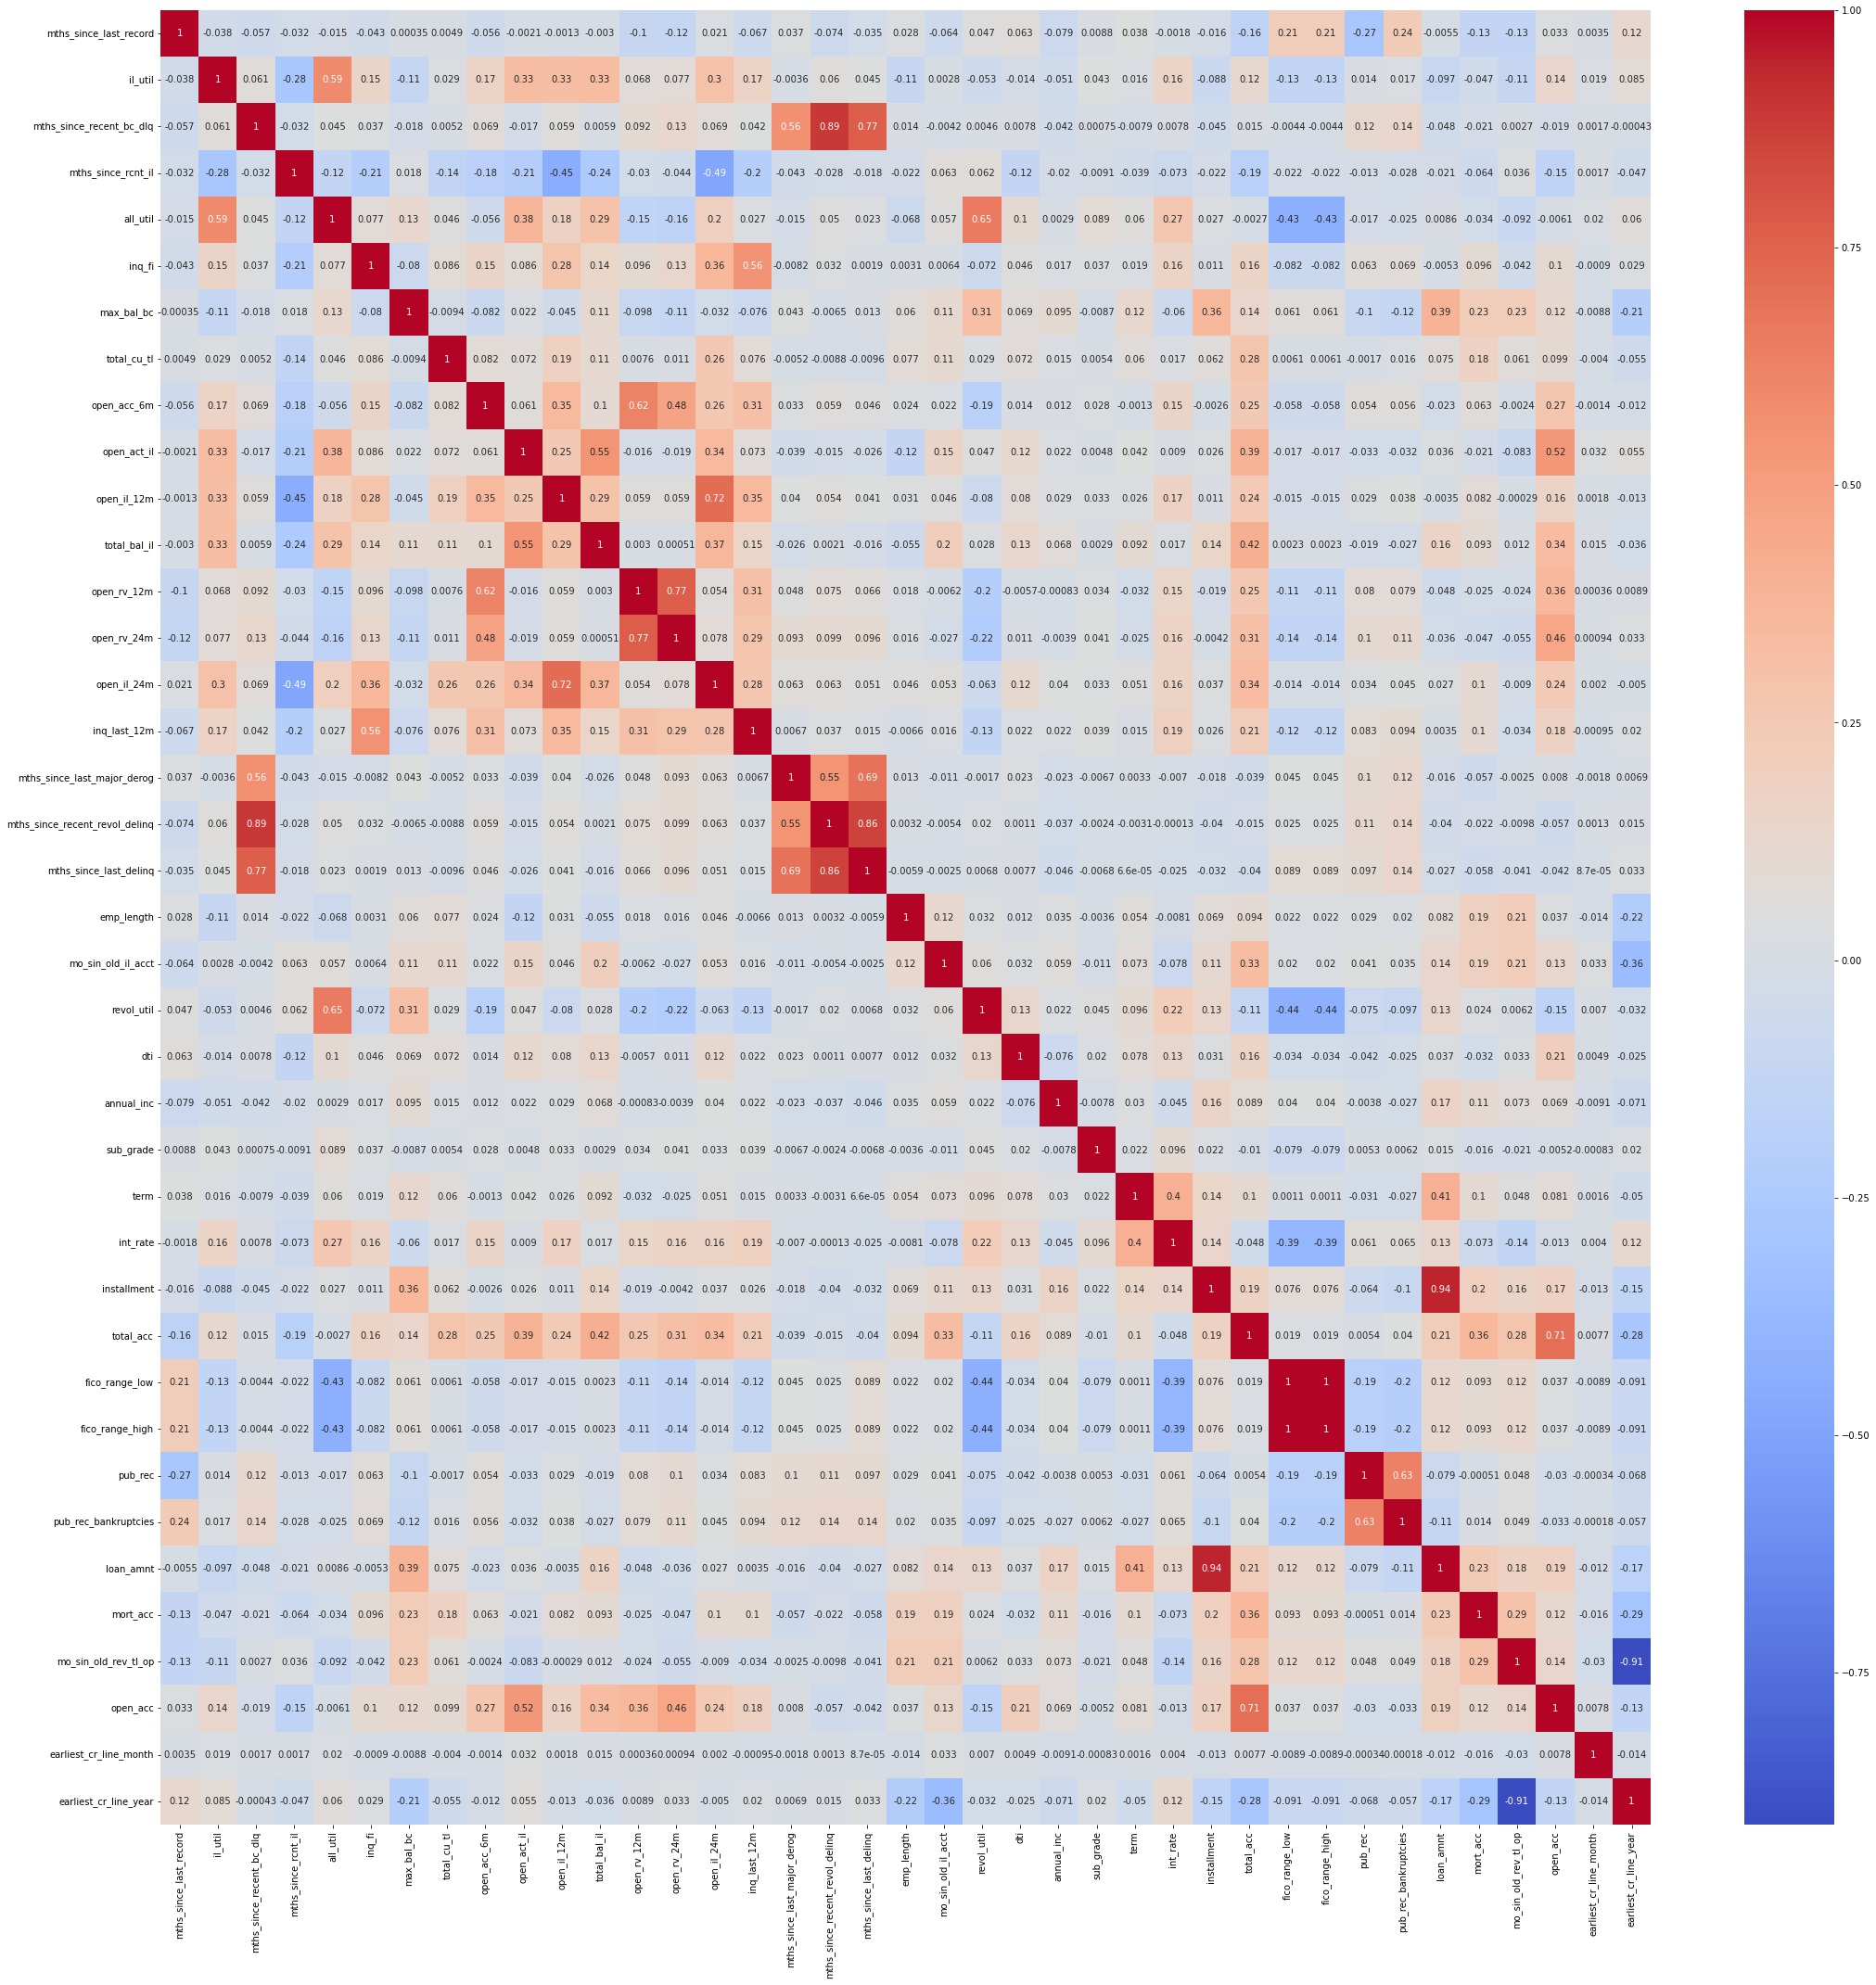

In [25]:
plt.figure(figsize=(36,36))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### 2. Imputación de missings


Para esta parte analizaremos las variables una por una, decidiremos qué método de imputación de missings se adapta mejor a cada una de ellas y lo aplicaremos.

Para empezar, recordemos qué forma tienen los datos en nuestras variables y el número de valores nulos que había en cada una de ellas.

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mths_since_last_record,155100.0,69.193056,26.469788,0.00,51.00,69.00,88.00,1.210000e+02
il_util,216581.0,68.935964,24.314068,0.00,54.00,71.00,86.00,4.640000e+02
mths_since_recent_bc_dlq,225434.0,39.128632,22.793899,0.00,20.00,37.00,58.00,1.950000e+02
mths_since_rcnt_il,242773.0,21.217005,25.439242,0.00,7.00,14.00,24.00,4.330000e+02
all_util,249497.0,58.072927,20.934080,0.00,44.00,59.00,73.00,2.110000e+02
inq_fi,249524.0,0.985092,1.470832,0.00,0.00,0.00,1.00,2.700000e+01
max_bal_bc,249524.0,5746.256717,5503.678029,0.00,2300.00,4397.00,7504.00,5.717930e+05
total_cu_tl,249524.0,1.448702,2.616477,0.00,0.00,0.00,2.00,7.100000e+01
open_acc_6m,249524.0,0.897461,1.106632,0.00,0.00,1.00,1.00,1.600000e+01
open_act_il,249524.0,2.880861,3.088793,0.00,1.00,2.00,3.00,5.500000e+01


In [26]:
data.isna().sum()

mths_since_last_record            729776
il_util                           668295
mths_since_recent_bc_dlq          659442
mths_since_rcnt_il                642103
all_util                          635379
inq_fi                            635352
max_bal_bc                        635352
total_cu_tl                       635352
open_acc_6m                       635352
open_act_il                       635352
open_il_12m                       635352
total_bal_il                      635352
open_rv_12m                       635352
open_rv_24m                       635352
open_il_24m                       635352
inq_last_12m                      635352
mths_since_last_major_derog       633263
mths_since_recent_revol_delinq    569042
mths_since_last_delinq            431427
emp_length                         51193
mo_sin_old_il_acct                 25614
revol_util                           489
dti                                  261
verification_status                    0
annual_inc      

Observemos que tenemos muchísimos valores nulos, demasiado para poder eliminar todos los datos que con algún valor missing. Tendremos que imputarles un valor. Para comenzar hagamos unas observaciones:

1. La variable que más valores nulos tiene es mths_since_last_record. Observemos que al tener tal extrema cantidad de missings es probable que esos missings tengan significado. Puesto que esta variable indica los meses que han pasado desde el último registro público, no es descabellado pensar que un valor nulo en esta variable significa que nunca se ha realizado uno de estos registros. Lo que a la hora de imputarlo nos deja difrentes opciones: la primera, es darle una clase nueva que indique que no tiene valor, esto lo podríamos hacer dando un valor negativo o algo que no apareciera en los datos; la segunda opción es darle el valor máximo del conjunto de datos, puesto que el tiempo es lineal tiene sentido que si no se ha hecho nunca un registro la fecha del último registro será "anterior" al del más antiguo. Tras valorarlo, hemos pensado que lo mejor es una mezcla de ambas. Daremos el valor del máximo más 12 (los meses que hay en un año), de esa manera respetamos el significado de la variable y además podremos indentificar todos estos valores si es necesario. Cambiaremos la distribución de la variable con esta medida, pero esto era algo que iba a ocurrir de todas maneras aunque imputáramos la media o la mediana (probocaríamos leptocurtez en la distribución).

2. Observamos que la medida presentada anteriormente se puede utilizar en las siguientes variables por las razones expuestas arriba: mths_since_recent_bc_dlq, mths_since_rcnt_il, mths_since_last_major_derog, mths_since_recent_revol_delinq, mths_since_last_delinq y mo_sin_old_il_acct.

3. Observamos que hay muchos missings en unas variables que reflejan el número de algunas operaciones específicas realizadas por los usuarios. Éstas son: all_util, inq_fi, max_bal_bc, total_cu_tl, open_acc_6m, open_act_il, open_il_12m, total_bal_il, open_rv_12m, open_rv_24m, open_il_24m, inq_last_12m. Todas con el mismo número de missings: 635352. Esto podría ser por un error en la recogida de los datos, pero todo apunta a que estos usuarios simplemente no realizan esta clase de operaciones. Por lo que lo más lógico sería imputar estos missings con el valor 0 en vez de con la media o la moda. Y, de hecho, eso haremos.

4. La variable il_util, merece un apartado a parte. Esto va a ser así por la importancia que tiene esta variable en lo que normalmente se llama credit score (que es básicamente, cuán fiable se es para devolver un préstamo). Esta variable refleja la tasa de utilización general y significa que los saldos de las tarjetas de crédito son demasiado altos. La tasa de utilización simplemente compara sus saldos generales en sus tarjetas de crédito con los límites de crédito generales. Como decíamos la tasa de utilización es el segundo factor más importante en la calificación crediticia solo detrás de los pagos atrasados. La tasa de utilización generalmente representa alrededor del 30 por ciento del puntaje de crédito total. Por lo tanto, observemos que estos valores missings, en realidad podrían presentar significado. Estos valores podrían ser faltantes por dos motivos: porque los usuarios no tengan un límite de crédito o porque no lo hayan pedido nunca. El primer caso es poco probable, pues raramente un banco no pone límite de crédito y, el segundo, es una buena señal, pues significa que el usuario no ha necesitado nunca pedir crédito por lo que lo juicioso sería darles a estos usuarios la máxima puntuación, que, en este caso sería el 0%.

5. Pasemos a la variable emp_length. Esta refleja el tiempo que ha estado el usuario trabajando en un trabajo. Como es una variable discreta entre 0 y 10 y el número de valores missings no es muy elevado los imputaremos por la moda.

6. Por último tenemos las variables revol_util y dt con valores missings. Ambas variables son continuas y presentan muy pocos valores missings por lo que utilizaremos el método de KNN para imputar esos valores desconocidos. Cogeremos como número de vecinos al 0.0001% de los datos totales. Es decir, 88 vecinos.

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [28]:
#Imputación de missings correspondientes a los puntos 1 y 2.
data.fillna({'mths_since_last_record': data["mths_since_last_record"].max()+12}, inplace=True)
data.fillna({'mths_since_recent_bc_dlq': data["mths_since_recent_bc_dlq"].max()+12}, inplace=True)
data.fillna({'mths_since_rcnt_il': data["mths_since_rcnt_il"].max()+12}, inplace=True)
data.fillna({'mths_since_last_major_derog': data["mths_since_last_major_derog"].max()+12}, inplace=True)
data.fillna({'mths_since_recent_revol_delinq': data["mths_since_recent_revol_delinq"].max()+12}, inplace=True)
data.fillna({'mths_since_last_delinq': data["mths_since_last_delinq"].max()+12}, inplace=True)
data.fillna({'mo_sin_old_il_acct': data["mo_sin_old_il_acct"].max()+12}, inplace=True)

In [29]:
#Imputación de missings correspondientes a los puntos 3 y 4.
data.fillna({'all_util': 0}, inplace=True)
data.fillna({'inq_fi': 0}, inplace=True)
data.fillna({'max_bal_bc': 0}, inplace=True)
data.fillna({'total_cu_tl': 0}, inplace=True)
data.fillna({'open_acc_6m': 0}, inplace=True)
data.fillna({'open_act_il': 0}, inplace=True)
data.fillna({'open_il_12m': 0}, inplace=True)
data.fillna({'total_bal_il': 0}, inplace=True)
data.fillna({'open_rv_12m': 0}, inplace=True)
data.fillna({'open_rv_24m': 0}, inplace=True)
data.fillna({'open_il_24m': 0}, inplace=True)
data.fillna({'inq_last_12m': 0}, inplace=True)
data.fillna({'il_util': 0}, inplace=True)

In [30]:
#Imputación de missings correspondientes al punto 5.
si = SimpleImputer(strategy='most_frequent')
data["emp_length"] = si.fit_transform(data["emp_length"].values.reshape(-1, 1))

In [33]:
#Imputación de missings correspondientes al punto 6.
knn = KNNImputer(n_neighbors=88)
data["revol_util"] = knn.fit_transform(data["revol_util"].values.reshape(-1, 1))
data["dti"] = knn.fit_transform(data["dti"].values.reshape(-1, 1))

Comprobemos que hemos eliminado todos los missings y observemos la nueva estructura de los datos:

In [36]:
data.isna().sum()

mths_since_last_record            0
il_util                           0
mths_since_recent_bc_dlq          0
mths_since_rcnt_il                0
all_util                          0
inq_fi                            0
max_bal_bc                        0
total_cu_tl                       0
open_acc_6m                       0
open_act_il                       0
open_il_12m                       0
total_bal_il                      0
open_rv_12m                       0
open_rv_24m                       0
open_il_24m                       0
inq_last_12m                      0
mths_since_last_major_derog       0
mths_since_recent_revol_delinq    0
mths_since_last_delinq            0
emp_length                        0
mo_sin_old_il_acct                0
revol_util                        0
dti                               0
verification_status               0
annual_inc                        0
home_ownership                    0
sub_grade                         0
grade                       

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mths_since_last_record,884876.0,121.815996,26.671037,0.00,133.00,133.00,133.00,1.330000e+02
il_util,884876.0,16.872669,31.986593,0.00,0.00,0.00,0.00,4.640000e+02
mths_since_recent_bc_dlq,884876.0,164.232523,74.045585,0.00,80.00,207.00,207.00,2.070000e+02
mths_since_rcnt_il,884876.0,328.731654,189.556883,0.00,48.00,445.00,445.00,4.450000e+02
all_util,884876.0,16.374069,28.396197,0.00,0.00,0.00,32.00,2.110000e+02
inq_fi,884876.0,0.277784,0.898061,0.00,0.00,0.00,0.00,2.700000e+01
max_bal_bc,884876.0,1620.372754,3902.177387,0.00,0.00,0.00,1142.00,5.717930e+05
total_cu_tl,884876.0,0.408516,1.534731,0.00,0.00,0.00,0.00,7.100000e+01
open_acc_6m,884876.0,0.253073,0.713027,0.00,0.00,0.00,0.00,1.600000e+01
open_act_il,884876.0,0.812367,2.090625,0.00,0.00,0.00,1.00,5.500000e+01
